In [1]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import pickle
import numpy as np
import pandas as pd
import networkx as net

In [2]:
colors = ['Red', 'tab:Blue', 'tab:Green', 'Gold', 
          'tab:Purple', 'Magenta', 'Orange', 'Cyan',
          'Gray', 'Black', 'Brown', 'Navy']

### An inteference graph of complete graph, for which the second smallest eigenvalue of the Lalacian, denoted by $\lambda_2(L)$, is equal to $8$.

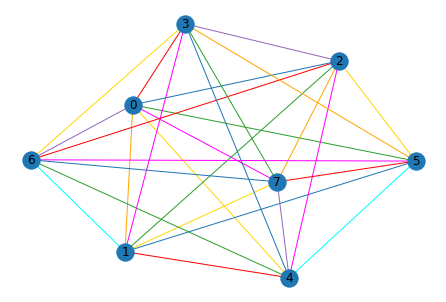

In [55]:
C = net.complete_graph( 8 )
pos = net.spring_layout(C)  # positions for all nodes
# Edge Coloring
L = net.line_graph(C)
edge_color_map = net.greedy_color(L)
edge_color = [ colors[ edge_color_map[edge] ] for edge in C.edges() ]

net.draw(C, pos, with_labels = True, node_color = 'tab:blue', edge_color = edge_color, width = 1)

In [13]:
Chi = max(edge_color_map.values()) + 1 # chromatic number for the edge-coloring scheme

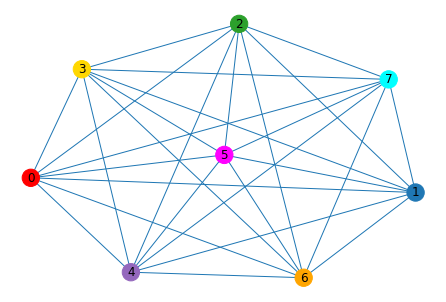

In [14]:
# Vertex Coloring on the 2-section Hypergraph of H = V, Hyperedges = [(each node i together with its neighbouring nodes)]
vertex_color_map = net.greedy_color(C)
node_color = [ colors[ vertex_color_map[node] ] for node in C.nodes() ]
net.draw(C, pos, with_labels = True, node_color = node_color, edge_color = 'tab:blue', witdth = 4)

In [6]:
Chi = max(vertex_color_map.values()) + 1 # chromatic number for the proposed [H]_2 based vertex coloring

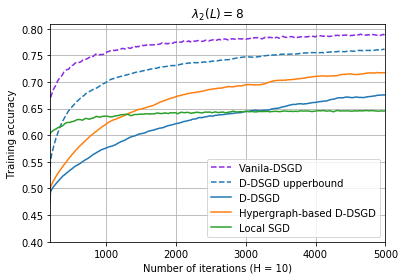

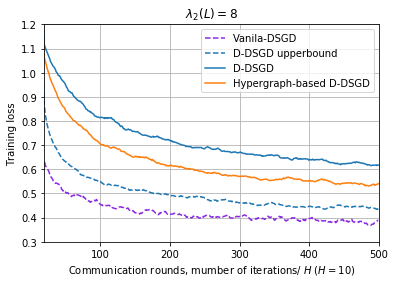

In [7]:
############ vanila DSGD ################
accses = pickle.load( open('./data/d_accs_vanila_DSGD_CG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')
# plt.legend( ['Vanila-DSGD (H=10)', 'Vanila-DSGD (H=5)', 'D-DSGD (H=10)', 'D-DSGD (H=5)', 'Local SGD'] )

############ D-DSGD based on SignHalf ################
accses = pickle.load( open('./data/d_accs_ub_D_DSGD_CG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(style = '--', color = 'tab:blue')

############ D-DSGD based on Edge Coloring ################
accses = pickle.load( open('./data/d_accs_D_DSGD_CG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:blue')

############ D-DSGD based on 2-section Hypergraph ################
accses = pickle.load( open('./data/d_accs_proposed_D_DSGD_CG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:orange')

############ Local Training ################
accses = pickle.load( open('./data/accs_local_SGD.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(color = 'tab:green')

# plt.plot(accses)
# plt.legend( [ 'Device_{}'.format( i + 1 ) for i in range(8) ] )
plt.legend( ['Vanila-DSGD', 'D-DSGD upperbound', 'D-DSGD', 'Hypergraph-based D-DSGD', 'Local SGD'] )
plt.xlabel('Number of iterations (H = 10)')
plt.ylabel('Training accuracy')
plt.title(r'$\lambda_2(L) = 8$')
plt.xlim([ 200, 5000 ])
# plt.ylim( [0.4, 0.8] )
plt.grid()
# plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/report/eps/vanila_DSGD_loss_vs_epoch.pdf',format='pdf', dpi=600)



plt.figure()
############ vanila DSGD ################
losseses = pickle.load( open('./data/d_losses_vanila_DSGD_CG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 10).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')
# plt.legend( ['Vanila-DSGD (H=10)', 'Vanila-DSGD (H=5)', 'D-DSGD (H=10)', 'D-DSGD (H=5)', 'Local SGD'] )

############ D-DSGD based on SignHalf ################
losseses = pickle.load( open('./data/d_losses_ub_D_DSGD_CG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(style = '--', color = 'tab:blue')

############ D-DSGD based on Edge Coloring ################
losseses = pickle.load( open('./data/d_losses_D_DSGD_CG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:blue')

############ D-DSGD based on 2-section Hypergraph ################
losseses = pickle.load( open('./data/d_losses_proposed_D_DSGD_CG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:orange')

# plt.plot(losseses)
# plt.legend( [ 'Device_{}'.format( i + 1 ) for i in range(8) ] )
plt.legend( ['Vanila-DSGD', 'D-DSGD upperbound', 'D-DSGD', 'Hypergraph-based D-DSGD'] )
plt.xlabel('Communication rounds, mumber of iterations/ $H$ ($H = 10$)')
plt.ylabel('Training loss')
plt.title(r'$\lambda_2(L) = 8$')
# plt.title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#           r'\frac{-e^{i\pi}}{2^n}$!', fontsize = 12)
plt.xlim([ 20, 500])
plt.ylim( [0.3, 1.2] )
plt.grid()

### An inteference graph of randomly generated {\em connected} graph ($\lambda_2(L) = 1.85$)

In [21]:
E = [(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 7), (5,6), (5, 7)]

In [22]:
len(E)

9

In [23]:
G = net.Graph()
G.add_edges_from(E)
pos = net.spring_layout(G)  # positions for all nodes

In [24]:
V = G.nodes()
G.number_of_nodes()
list(G.neighbors(3))

[1, 2, 4, 5]

In [32]:
net.algebraic_connectivity(G)

0.6150412522324779

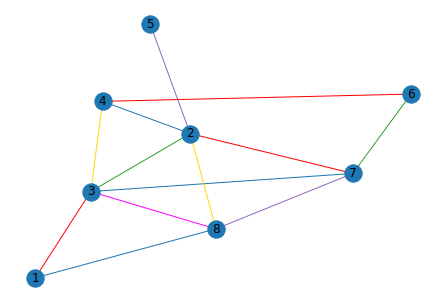

In [7]:
L = net.line_graph(G)
edge_color_map = net.greedy_color(L, strategy = 'connected_sequential')
edge_color = [ colors[ edge_color_map[edge] ] if edge in edge_color_map.keys() else 
              colors[edge_color_map[tuple(reversed(edge))]] for edge in G.edges() ]

net.draw(G, pos, with_labels = True, node_color = 'tab:blue', edge_color = edge_color, witdth = 4)

In [61]:
def TwoSectionH(G): # Generate the 2-section of the proposed hypergraph, i.e., H2
    # VertexH = G.nodes()
    Hyperedge = [ tuple(sorted([i+1] + [n for n in G.neighbors(i+1)])) 
                                    for i in range(G.number_of_nodes()) ] # construct a hypergraph each of whose hyperedge consists of a node and its neighbours
    Hyperedge = list(set(Hyperedge)) # remove any repeated hyperedges
    H2Edges = [[tuple(sorted(e)) for e in net.complete_graph(he).edges()] for he in Hyperedge] # a list of list of edges of H2
    temp = [] # remove the inner list
    for e in H2Edges:
        temp.extend(e)
    H2Edges = list(set(temp)) # remove any repeated edges

    H2 = net.Graph()
    H2.add_nodes_from(G.nodes())
    H2.add_edges_from(H2Edges)
    vertex_color_map = net.greedy_color(H2, strategy = 'connected_sequential') # vertex coloring H2
    
    return H2, vertex_color_map

In [43]:
Chi = max(vertex_color_map.values()) + 1 # chromatic number of the present coloring scheme

In [47]:
H2, map = TwoSectionH(G)

In [48]:
H2.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (2, 4), (3, 6), (3, 7), (3, 4), (3, 5), (4, 7), (4, 6), (4, 5), (5, 6), (5, 7), (7, 6)])

In [49]:
Chi

5

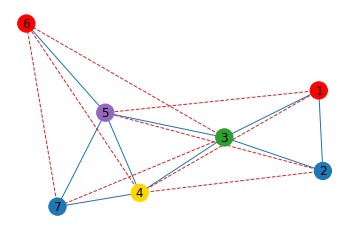

In [51]:
# Vertex Coloring on the 2-section Hypergraph of H = V, Hyperedges = [(each node i together with its neighbouring nodes)]
node_color = [ colors[ map[node] ] for node in H2.nodes() ]
# net.draw(H2, pos, with_labels = True, node_color = node_color, edge_color = 'tab:blue', witdth = 4)
net.nx.draw_networkx_nodes(G, pos, node_color = node_color)
edge_org = [(u,v) for u,v in G.edges()]
edge_added = [(u,v) for u,v in H2.edges() if (u,v) not in G.edges() and (v,u) not in G.edges()]
net.draw_networkx_edges(G, pos, edgelist = edge_org, edge_color = 'tab:blue')
net.draw_networkx_edges(G, pos, edgelist = edge_added, edge_color = 'tab:red', style = 'dashed')

labels = {node : r'${}$'.format(node) for node in G.nodes()}
_ = net.draw_networkx_labels(G, pos, labels)
_ =plt.axis ('off')

In [17]:
edge_org

[(1, 3),
 (1, 8),
 (3, 2),
 (3, 4),
 (3, 7),
 (3, 8),
 (8, 2),
 (8, 7),
 (2, 4),
 (2, 5),
 (2, 7),
 (4, 6),
 (7, 6)]

In [40]:
edge_added

[(1, 4), (1, 5), (2, 5), (2, 4), (3, 6), (3, 7), (4, 6), (7, 6)]

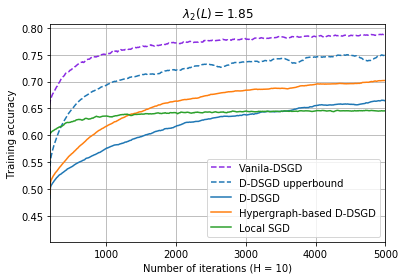

In [19]:
############ vanila DSGD ################
accses = pickle.load( open('./data/d_accs_vanila_DSGD_DG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')

############ D-DSGD based on SignHalf ################
accses = pickle.load( open('./data/d_accs_ub_D_DSGD_DG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(style = '--', color = 'tab:blue')

############ D-DSGD based on Edge Coloring ################
accses = pickle.load( open('./data/d_accs_D_DSGD_DG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:blue')

############ D-DSGD based on 2-section Hypergraph ################
accses = pickle.load( open('./data/d_accs_proposed_D_DSGD_DG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:orange')

############ Local Training ################
accses = pickle.load( open('./data/accs_local_SGD.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(color = 'tab:green')

# plt.plot(accses)
# plt.legend( [ 'Device_{}'.format( i + 1 ) for i in range(8) ] )
plt.legend( ['Vanila-DSGD', 'D-DSGD upperbound', 'D-DSGD', 'Hypergraph-based D-DSGD', 'Local SGD'] )
plt.xlabel('Number of iterations (H = 10)')
plt.ylabel('Training accuracy')
plt.title(r'$\lambda_2(L) = 1.85$')
plt.xlim([ 200, 5000 ])
# plt.ylim( [0.4, 0.8] )
plt.grid()

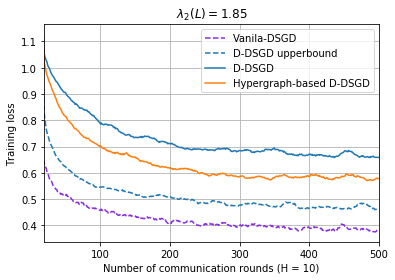

In [20]:
############ vanila DSGD ################
losseses = pickle.load( open('./data/d_losses_vanila_DSGD_DG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.rolling(window = 10).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')
# plt.legend( ['Vanila-DSGD (H=10)', 'Vanila-DSGD (H=5)', 'D-DSGD (H=10)', 'D-DSGD (H=5)', 'Local SGD'] )

############ D-DSGD based on SignHalf ################
losseses = pickle.load( open('./data/d_losses_ub_D_DSGD_DG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(style = '--', color = 'tab:blue')

############ D-DSGD based on Edge Coloring ################
losseses = pickle.load( open('./data/d_losses_D_DSGD_DG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:blue')

############ D-DSGD based on 2-section Hypergraph ################
losseses = pickle.load( open('./data/d_losses_proposed_D_DSGD_DG_H_10.pkl', 'rb') )
losseses = np.array(losseses)
df = pd.DataFrame(losseses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:orange')


# plt.plot(losseses)
# plt.legend( [ 'Device_{}'.format( i + 1 ) for i in range(8) ] )
plt.legend( ['Vanila-DSGD', 'D-DSGD upperbound', 'D-DSGD', 'Hypergraph-based D-DSGD'] )
plt.xlabel('Number of communication rounds (H = 10)')
plt.ylabel('Training loss')
plt.title(r'$\lambda_2(L) = 1.85$')
plt.xlim([ 20, 500 ])
# plt.ylim( [0.4, 0.8] )
plt.grid()

In [7]:
E = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,1)]
len(E)

8

### An interference graph of a "ring"

In [8]:
R = net.Graph()
R.add_edges_from(E)
pos = net.spring_layout(R)  # positions for all nodes

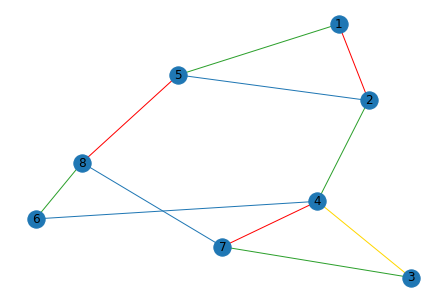

In [9]:
L = net.line_graph(R)
edge_color_map = net.greedy_color(L, strategy = 'connected_sequential')
edge_color = [ colors[ edge_color_map[edge] ] if edge in edge_color_map.keys() else 
              colors[edge_color_map[tuple(reversed(edge))]] for edge in R.edges() ]

net.draw(R, pos, with_labels = True, node_color = 'tab:blue', edge_color = edge_color, witdth = 4)

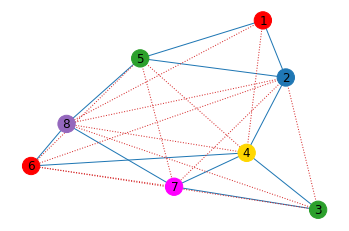

In [24]:
H2, vertex_color_map = TwoSectionH(R)
# Vertex Coloring on the 2-section Hypergraph of H = V, Hyperedges = [(each node i together with its neighbouring nodes)]
vertex_color_map = net.greedy_color(H2, strategy = 'connected_sequential')
node_color = [ colors[ vertex_color_map[node] ] for node in H2.nodes() ]
# net.draw(H2, pos, with_labels = True, node_color = node_color, edge_color = 'tab:blue', witdth = 4)

net.nx.draw_networkx_nodes(H2, pos, node_color = node_color)
edge_org = [(u,v) for u,v in R.edges()]
edge_added = [(u,v) for u,v in H2.edges() if (u,v) not in R.edges()]
net.draw_networkx_edges(R, pos, edgelist = edge_org, edge_color = 'tab:blue')
net.draw_networkx_edges(R, pos, edgelist = edge_added, edge_color = 'tab:red', style = ':')

labels = {node : r'${}$'.format(node) for node in R.nodes()}
_ = net.draw_networkx_labels(R, pos, labels)
_ =plt.axis ('off')

In [12]:
H2.nodes()

NodeView((1, 2, 5, 4, 3, 7, 6, 8))

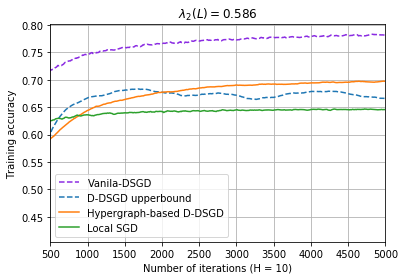

In [3]:
############ vanila DSGD ################
accses = pickle.load( open('./data/d_accs_vanila_DSGD_SG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')

############ D-DSGD based on SignHalf ################
accses = pickle.load( open('./data/d_accs_ub_D_DSGD_SG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 50).mean().mean(axis = 1).plot(style = '--', color = 'tab:blue')


############ D-DSGD based on 2-section Hypergraph ################
accses = pickle.load( open('./data/d_accs_proposed_D_DSGD_SG_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 20).mean().mean(axis = 1).plot(color = 'tab:orange')

############ Local Training ################
accses = pickle.load( open('./data/accs_local_SGD.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
df.index = df.index * 10
df.rolling(window = 5).mean().mean(axis = 1).plot(color = 'tab:green')

# plt.plot(accses)
# plt.legend( [ 'Device_{}'.format( i + 1 ) for i in range(8) ] )
plt.legend( ['Vanila-DSGD', 'D-DSGD upperbound', 'Hypergraph-based D-DSGD', 'Local SGD'] )
plt.xlabel('Number of iterations (H = 10)')
plt.ylabel('Training accuracy')
plt.title(r'$\lambda_2(L) = 0.586$')
plt.xlim([ 500, 5000 ])
# plt.ylim( [0.4, 0.8] )
plt.grid()

FileNotFoundError: [Errno 2] No such file or directory: './data/star_accs_SCHEME_3_N_12559.43_False_sr_0.90_20-4.pkl'

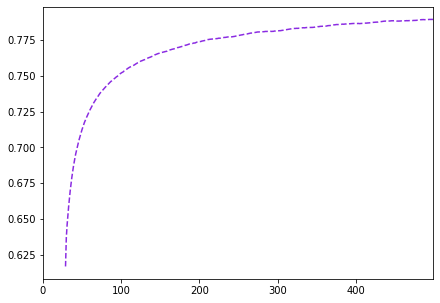

In [36]:
fig, ax = plt.subplots(figsize = (7.0,5))
############ Ideal DSGD ################
accses = pickle.load( open('./data/accs_vanila_DSGD_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 30).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet')
# plt.legend( ['Vanila-DSGD (H=10)', 'Vanila-DSGD (H=5)', 'D-DSGD (H=10)', 'D-DSGD (H=5)', 'Local SGD'] )

############ D-DSGD ################
accses = pickle.load( open('./data/star_accs_SCHEME_3_N_12559.43_False_sr_0.90_20-4.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 60).mean().mean(axis = 1).plot(color = 'darkcyan')

# ############ TDMA based D-DSGD ################
# accses = pickle.load( open('./data/star_accs_SCHEME_3_N_12559.43_False_sr_0.90_20-4.pkl', 'rb') )
# accses = np.array(accses)
# df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# # df.index = df.index * 10
# df.rolling(window = 70).mean().mean(axis = 1).plot(color = 'tab:cyan')

############ A-DSGD ################
accses = pickle.load( open('./data/star_accs_SCHEME_5_N_12559.43_True_sr_0.60_20-4.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 50).mean().mean(axis = 1).plot(color = 'firebrick')

############ TDMA based A-DSGD ################
accses = pickle.load( open('./data/star_accs_SCHEME_6_N_12559.43_True_sr_0.90_20-4.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 30).mean().mean(axis = 1).plot(color = 'lightcoral')

############ Local SGD ################
accses = pickle.load( open('./data/accs_local_SGD.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
df.rolling(window = 30).mean().mean(axis = 1).plot(color = 'tab:green')

# plt.legend( [r'noiseless DSGD', 'upperbound D-DSGD', 'D-DSGD', 'TDMA based D-DSGD', 
#              'A-DSGD ($\mathrm{SNR} = 10$dB)', 'A-DSGD ($\mathrm{SNR} = 30$dB)' 'Local SGD'] )
# generated ER graph with $p = 0.2$
plt.xlabel(r'Multiples of training iterations $t$ w.r.t $\tau$ ($t=\tau, 2\tau, \ldots$)')
plt.ylabel('Average test accuracy')
# plt.title(r'$\lambda_2(L) = 8$')
plt.xlim((70, 500))
plt.ylim((0.57, 0.80))
plt.grid()

# Put legend using annotation
_ = ax.annotate(r'ideal communications',
            xy = (120, .76), xycoords = 'data',
            xytext = (13, 32), textcoords = 'offset points',
            arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
_ = ax.annotate(r'D-DSGD (TDMA-based D-DSGD)',
            xy = (290, .715), xycoords = 'data',
            xytext = (25, 50), textcoords = 'offset points',
            arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
# _ = ax.annotate(r'TDMA based D-DSGD',
#             xy = (370, .72), xycoords = 'data',
#             xytext = (-145, -27), textcoords = 'offset points',
#             arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
_ = ax.annotate(r'no communications',
            xy = (300, .644), xycoords = 'data',
            xytext = (50, -25), textcoords = 'offset points',
            arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
_ = ax.annotate(r'A-DSGD',
            xy = (200, .725), xycoords = 'data',
            xytext = (20, 40), textcoords = 'offset points',
            arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
_ = ax.annotate(r'TDMA-based A-DSGD',
            xy = (250, .60), xycoords = 'data',
            xytext = (50, -25), textcoords = 'offset points',
            arrowprops=dict(facecolor = 'black', width = 2, headwidth = 7, shrink = 0.03))
plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/SPAWC20_double_col/eps/comp_acc_vs_commun_small_p.eps',format='eps', dpi=600)

In [5]:
# Calculate weighted moving average for results with less episodes of training
SCHEME_array = ['3', '4']
N_array = np.array([5e3, 12559.43, 31547.87, 79244.66, 199053.59, 5e5])
for s in SCHEME_array:
    exec('S' + '{:s}'.format(s) + '_array = np.zeros(N_array.shape)')
    for i, N in enumerate(N_array):
        if i == 0:
            accses = pickle.load( open(('./data/accs_SCHEME_' + '{:s}' + '_N_{:.0e}.pkl').format(s, N), 'rb') )
            accses = np.array(accses)
            df = pd.DataFrame(accses.mean(axis= 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
            temp = df.rolling(window = 30).mean().mean(axis = 1).iloc[-1]
            exec('S' + '{:s}'.format(s) + '_array[i] = temp')
        else:
#             accses = pickle.load( open(('./data/accs_SCHEME_' + '{:s}' + '_N_{:.0e}_20-9.pkl').format(s, N), 'rb') )
#             accses = np.array(accses)
#             df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
            accses = pickle.load( open(('./data/accs_SCHEME_' + '{:s}' + '_N_{:.0e}_20-0.pkl').format(s, N), 'rb') )
            accses = np.array(accses[0])
            df = pd.DataFrame(accses, columns = ['Device_{}'.format(i + 1) for i in range(8)] )
            temp = df.rolling(window = 70).mean().mean(axis = 1).iloc[-1]
            exec('S' + '{:s}'.format(s) + '_array[i] = temp')
            
############ Ideal DSGD ################
accses = pickle.load( open('./data/accs_vanila_DSGD_H_10.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
temp = df.rolling(window = 30).mean().mean(axis = 1).iloc[-1]
S1_array = temp * np.ones(N_array.shape)

############ Local SGD ################
accses = pickle.load( open('./data/accs_local_SGD.pkl', 'rb') )
accses = np.array(accses)
df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
# df.index = df.index * 10
temp = df.rolling(window = 30).mean().mean(axis = 1).iloc[-1]
S2_array = temp * np.ones(N_array.shape)

In [7]:
s = '4'
for i, N in enumerate(N_array):
    if i == 0:
        accses = pickle.load( open(('./data/accs_SCHEME_' + '{:s}' + '_N_{:.0e}.pkl').format(s, N), 'rb') )
        accses = np.array(accses)
        df = pd.DataFrame(accses.mean(axis= 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
        temp = df.rolling(window = 30).mean().mean(axis = 1).iloc[-1]
        exec('S' + '{:s}'.format(s) + '_array[i] = temp')
    else:
        accses = pickle.load( open(('./data/accs_SCHEME_' + '{:s}' + '_N_{:.0e}_20-9.pkl').format(s, N), 'rb') )
        accses = np.array(accses)
        df = pd.DataFrame(accses.mean(axis = 0), columns = ['Device_{}'.format(i + 1) for i in range(8)] )
        temp = df.rolling(window = 70).mean().mean(axis = 1).iloc[-1]
        exec('S' + '{:s}'.format(s) + '_array[i] = temp')
S3_array

array([0.73101898, 0.7252778 , 0.72727603, 0.72390127, 0.72730159,
       0.72593605])

In [8]:
S4_array

array([0.71922317, 0.72292269, 0.72387232, 0.72042873, 0.72674727,
       0.72329699])

In [9]:
S5_array

array([0.66719767, 0.70336268, 0.70443375, 0.78758125, 0.78647768,
       0.78688714])

In [10]:
S6_array

array([0.49637636, 0.70294839, 0.70532786, 0.78068214, 0.78630464,
       0.78794964])

In [3]:
K = 8
G = net.complete_graph(K)
pos = net.spring_layout(G)

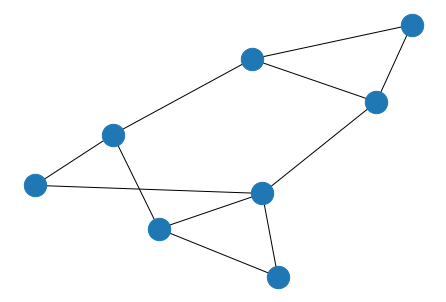

In [4]:
seeds = iter(range(1000))
p = 0.3
alg_connect = 0
while alg_connect < 1e-6:
    G = net.erdos_renyi_graph(K, p, seed = next(seeds))
#     E = [(i+1, j+1) for i, j in G.edges()]
    E = G.edges()
    L = np.array(net.laplacian_matrix(G).todense())
    D, V = np.linalg.eigh(L) # eigenvalues are assumed given in an ascending order
    alg_connect = D[1] 
    
G = net.Graph()
G.add_edges_from(E)
pos = net.spring_layout(G)
net.draw(G, pos, node_size = 500, font_size = 16)

In [5]:
E

EdgeView([(0, 1), (0, 4), (1, 3), (1, 4), (2, 3), (2, 6), (3, 5), (3, 6), (4, 7), (5, 7), (6, 7)])

In [6]:
def TwoSectionH(G): # Generate the 2-section of the proposed hypergraph, i.e., H2
    # VertexH = G.nodes()
    Hyperedge = [ tuple(sorted([node] + [n for n in G.neighbors(node)])) 
                                    for node in G.nodes() ] # construct a hypergraph each of whose hyperedge consists of a node and its neighbours
    Hyperedge = list(set(Hyperedge)) # remove any repeated hyperedges
    H2Edges = [[tuple(sorted(e)) for e in net.complete_graph(he).edges()] for he in Hyperedge] # a list of list of edges of H2
    temp = [] # remove the inner list
    for e in H2Edges:
        temp.extend(e)
    H2Edges = list(set(temp)) # remove any repeated edges

    H2 = net.Graph()
    H2.add_nodes_from(G.nodes())
    H2.add_edges_from(H2Edges)
    vertex_color_map = net.greedy_color(H2, strategy = 'connected_sequential') # vertex coloring H2
    
    return H2, vertex_color_map

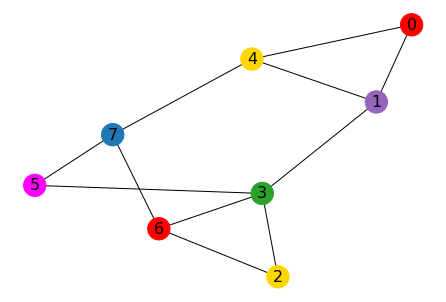

In [7]:
H2, vertex_color_map = TwoSectionH(G)
node_color = [ colors[ vertex_color_map[node] ] for node in H2.nodes() ]
net.draw(G, pos, with_labels = True, node_color = node_color, node_size = 500, font_size = 16)

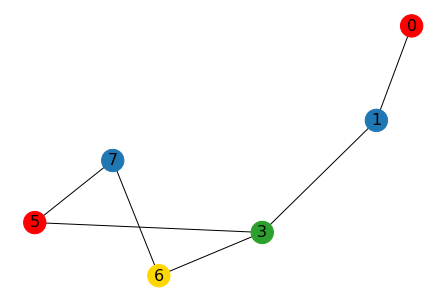

In [8]:
Chi = max(vertex_color_map.values()) + 1
G.remove_node(2)
G.remove_node(4)
H2, vertex_color_map = TwoSectionH(G)
node_color = [ colors[ vertex_color_map[node] ] for node in H2.nodes() ]
net.draw(G, pos, with_labels = True, node_color = node_color, node_size = 500, font_size = 16)

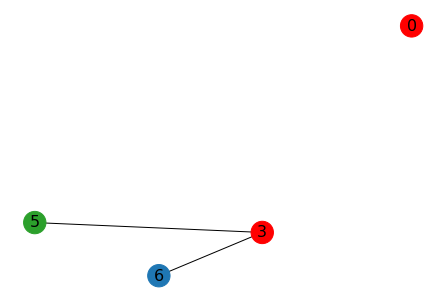

In [9]:
G.remove_node(1)
G.remove_node(7)
H2, vertex_color_map = TwoSectionH(G)
node_color = [ colors[ vertex_color_map[node] ] for node in H2.nodes() ]
net.draw(G, pos, with_labels = True, node_color = node_color, node_size = 500, font_size = 16)